In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import numpy as np
from shutil import move, copy
import random
import math
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [77]:
def copy_random_sample(src_dir, dst_dir, label, sample_size):
    try:
        # Obtain a random list of images of size k without replacement
        sample = random.sample(os.listdir(src_dir), k=sample_size)
        
        for index, file in enumerate(sample):
            src_path = os.path.join(src_dir,file)
            dst_path = os.path.join(dst_dir,'{}.{}.jpg'.format(label,index))
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            copy(src_path, dst_path)

    except Exception as e:
        raise e
        print("Error! No files found here")

    print('Complete')

In [78]:
def copy_all(sample, src_dir, dst_dir, label):
    try:
        for index, file in enumerate(sample):
            src_path = os.path.join(src_dir,file)
            dst_path = os.path.join(dst_dir,'{}.{}.jpg'.format(label,index))
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            copy(src_path, dst_path)

    except Exception as e:
        raise e
        print("Error! No files found here")

    print('Complete.')

# Data Loading

Read STM Au(111) data into memory via ImageDataGenerator.

In [79]:
root_dir ='H:\\Research\\AI_STM\\sxm-storage\\'
labels = ['artifacts',
          'atomic-lattice-clear',
          'atomic-lattice-unclear',
          'herringbone-clear',
          'herringbone-unclear',
          'other',
          'steps-clear',
          'steps-unclear',
          'unsure']
img_dir =  os.path.join(root_dir, 'All Au(111)')
sources = [os.path.join(img_dir, label) for label in labels]
sources

['H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\artifacts',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\atomic-lattice-clear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\atomic-lattice-unclear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\herringbone-clear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\herringbone-unclear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\other',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\steps-clear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\steps-unclear',
 'H:\\Research\\AI_STM\\sxm-storage\\All Au(111)\\unsure']

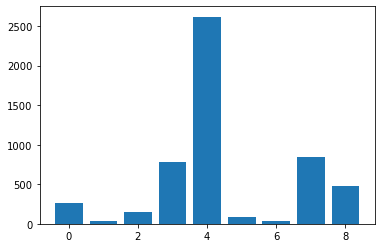

In [80]:
num_data = [len(os.listdir(source)) for source in sources]
plt.bar(range(len(num_data)), num_data)
plt.show()

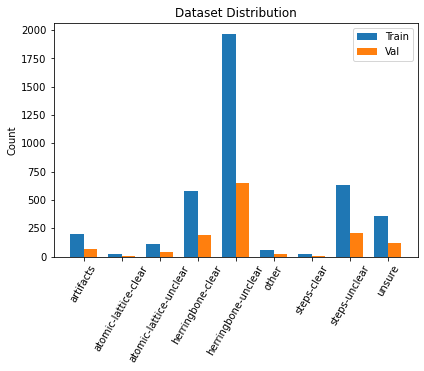

In [81]:
num_train = [math.floor(count * 0.75) for count in num_data]
num_val =  [math.floor(count * 0.25) for count in num_data]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num_train, width, label='Train')
rects2 = ax.bar(x + width/2, num_val, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Dataset Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=60)
plt.show()

In [82]:
out = '-'.join(labels)
out_dir = os.path.join(root_dir, 'datasets', out)
train_dir = os.path.join(out_dir, 'train')
validation_dir = os.path.join(out_dir, 'validation')
training_label_dirs = list(map(lambda label: os.path.join(train_dir, label), labels))
validation_label_dirs = list(map(lambda label: os.path.join(validation_dir, label), labels))
validation_label_dirs

['H:\\Research\\AI_STM\\sxm-storage\\datasets\\artifacts-atomic-lattice-clear-atomic-lattice-unclear-herringbone-clear-herringbone-unclear-other-steps-clear-steps-unclear-unsure\\validation\\artifacts',
 'H:\\Research\\AI_STM\\sxm-storage\\datasets\\artifacts-atomic-lattice-clear-atomic-lattice-unclear-herringbone-clear-herringbone-unclear-other-steps-clear-steps-unclear-unsure\\validation\\atomic-lattice-clear',
 'H:\\Research\\AI_STM\\sxm-storage\\datasets\\artifacts-atomic-lattice-clear-atomic-lattice-unclear-herringbone-clear-herringbone-unclear-other-steps-clear-steps-unclear-unsure\\validation\\atomic-lattice-unclear',
 'H:\\Research\\AI_STM\\sxm-storage\\datasets\\artifacts-atomic-lattice-clear-atomic-lattice-unclear-herringbone-clear-herringbone-unclear-other-steps-clear-steps-unclear-unsure\\validation\\herringbone-clear',
 'H:\\Research\\AI_STM\\sxm-storage\\datasets\\artifacts-atomic-lattice-clear-atomic-lattice-unclear-herringbone-clear-herringbone-unclear-other-steps-clear

In [8]:
# Re-order train and vlidation images
for i, label in enumerate(labels):
    src = sources[i]
    train = training_label_dirs[i]
    n_train = num_train[i]
    val = validation_label_dirs[i]
    n_val = num_val[i]
    images = os.listdir(src)
    # Obtain a random list of images of size k without replacement to use as the valiation set
    val_sample = random.sample(images, k=n_val)
    # Remove sample from origional list 
    train_sample = list(set(images)-set(val_sample))
    # Copy validation images to new folder
    copy_all(val_sample, src, val, label)
    # Copy remaining training images to new folder
    copy_all(train_sample, src, train, label)

Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.
Complete.


# Import Data

In [83]:
# Number of training examples to process before updating our models variables
BATCH_SIZE = 100 
# Our training data consists of images with width of 150 pixels and height of 150 pixels
IMG_SHAPE  = 150

In [84]:
# Generator for our training data
train_image_generator      = ImageDataGenerator(rescale=1./255)
# Generator for our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [85]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary')

Found 3965 images belonging to 9 classes.


In [86]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary')

Found 1317 images belonging to 9 classes.


In [87]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

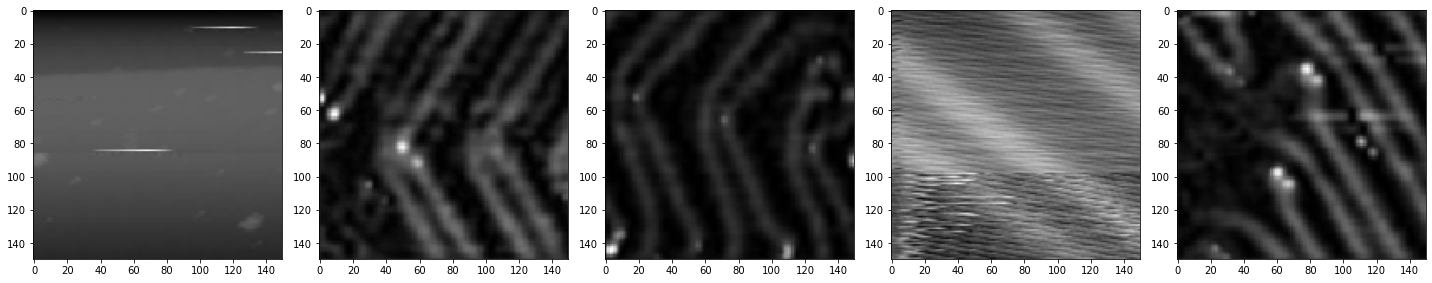

In [88]:
sample_training_images, _ = next(train_data_gen) 
plotImages(sample_training_images[:5])  # Plot images 0-4

In [89]:
print(len(sample_training_images[0][0][0]))

3


In [90]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=5,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 3965 images belonging to 9 classes.


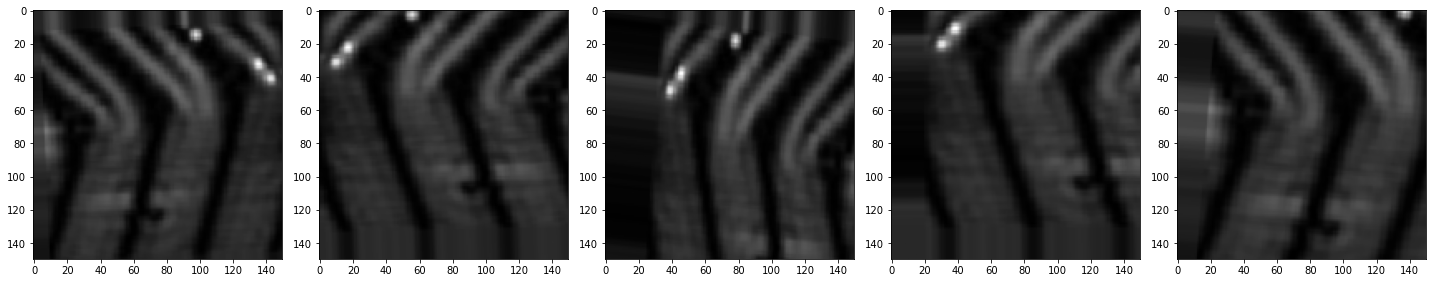

In [91]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

0.14509805


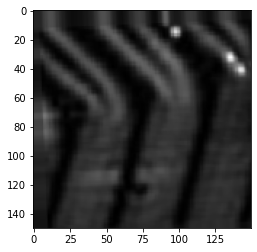

In [92]:
print(augmented_images[0][0][0][0])
plt.imshow(augmented_images[0])

In [93]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1317 images belonging to 9 classes.


# Define the model

In [94]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9)
])

In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [96]:
# opt = tf.keras.optimizers.SGD(
#     learning_rate=0.01, momentum=0.001, name='SGD'
# )
# model.compile(optimizer=opt,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

## Train updated model

In [98]:
# Since our batches are coming from a generator (ImageDataGenerator), we'll use fit_generator instead of fit.
epochs=400
total_train = sum(num_train)
total_val = sum(num_val)
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/400
40/40 [==============================] - 120s 3s/step - loss: 1.5434 - accuracy: 0.4845 - val_loss: 1.3366 - val_accuracy: 0.5133
Epoch 2/400
40/40 [==============================] - 76s 2s/step - loss: 1.3260 - accuracy: 0.5100 - val_loss: 1.2339 - val_accuracy: 0.5520
Epoch 3/400
40/40 [==============================] - 71s 2s/step - loss: 1.2442 - accuracy: 0.5332 - val_loss: 1.2062 - val_accuracy: 0.5171
Epoch 4/400
40/40 [==============================] - 59s 1s/step - loss: 1.1687 - accuracy: 0.5536 - val_loss: 1.2366 - val_accuracy: 0.5232
Epoch 5/400
40/40 [==============================] - 59s 1s/step - loss: 1.1552 - accuracy: 0.5682 - val_loss: 1.0765 - val_accuracy: 0.5626
Epoch 6/400
40/40 [==============================] - 58s 1s/step - loss: 1.0830 - accuracy: 0.5980 - val_loss: 1.0058 - val_accuracy: 0.6424
Epoch 7/400
40/40 [==============================] - 58s 1s/step - loss: 1.0278 - accuracy: 0.6164 - val_loss: 0.9900 - val_accuracy: 0.6264
Epoch 8/400


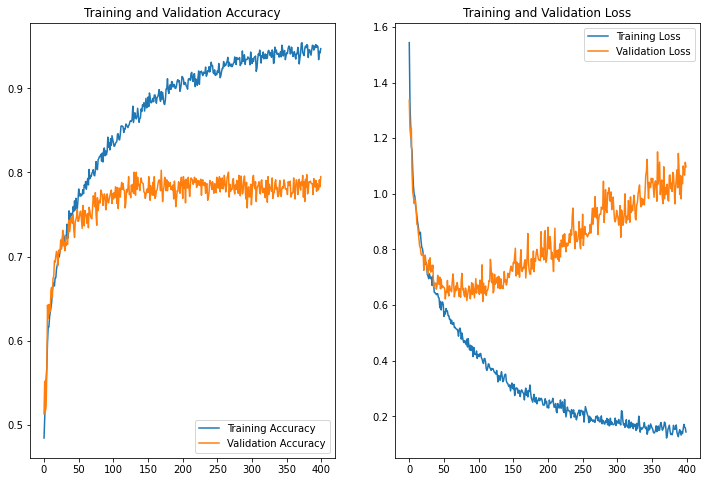

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()